# Introduction: Copernican Lifetime Equation

In this notebook, we take a look at the Copernican lifetime equation, a simple method for calculating the lifetime of any phenomomenon. The original discussion of this equation is worth a read and can be found on SciHub (questionably legal) [here](https://sci-hub.tw/10.1038/363315a0). 

In [49]:
# https://towardsdatascience.com/the-copernican-principle-and-how-to-use-statistics-to-figure-out-how-long-anything-will-last-9cceb7aba20a

In [59]:
from IPython.display import IFrame

IFrame(src='https://towardsdatascience.com/the-copernican-principle-and-how-to-use-statistics-to-figure-out-how-long-anything-will-last-9cceb7aba20a', width=300, height=200)

In [24]:
# Data science imports
#import cufflinks
import plotly.graph_objs as go
#import plotly.plotly as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#cufflinks.go_offline()

# Calculations

$$(\frac{z}{1 - z})*t_{current}\le t_{future} \le (\frac{1 - z}{z}) * t_{current}$$

$$z = \frac{1-\text{confidence interval}}{2}$$

In [37]:
def calculate_multipliers(ci):
    import numpy as np
    z = (1 - ci) / 2
    upper_multiplier = np.round((1 - z) / z, 3)
    lower_multiplier = np.round(z / (1 - z), 3)
    return lower_multiplier, upper_multiplier

In [38]:
calculate_multipliers(0.95)
calculate_multipliers(0.99)
calculate_multipliers(0.5)


(0.026, 39.0)

(0.005, 199.0)

(0.333, 3.0)

In [39]:
def calculate_lifetime(t_current, ci):
    import numpy as np
    low, high = calculate_multipliers(ci)
    t_low =  np.round(t_current * low, 3)
    t_high = np.round(t_current * high, 3)
    return t_low, t_high

To use this equation, `t_current` must be in years, and `ci` must be a fraction.

# Lifetime of Humanity

https://en.wikipedia.org/wiki/Human_evolution#H._sapiens

In [40]:
calculate_lifetime(200000, 0.95)

(5200.0, 7800000.0)

Let's write a quick function to nicely display the results.

In [41]:
from datetime import datetime, timedelta

In [42]:
def print_lifetime(t_current, ci):
    low, high = calculate_lifetime(t_current, ci)
    now = datetime.now()
    try:
        print(
            f'Estimated lifetime from {(now + timedelta(days=low*365)).date()} ({low:,.2f} years) to {(now + timedelta(days=high*365)).date()} ({high:,.0f} years).'
        )
    except:
        print(f'Estimated lifetime in years: {low:,.2f} to {high:,.0f}.')

In [44]:
print_lifetime(200000, 0.95)

Estimated lifetime in years: 5,200.00 to 7,800,000.


In [45]:
print_lifetime(200000, 0.99)

Estimated lifetime in years: 1,000.00 to 39,800,000.


# Data Science

https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

In [46]:
print_lifetime(2020 - 2012, 0.95)

Estimated lifetime from 2021-01-18 (0.21 years) to 2332-08-20 (312 years).


In [47]:
print_lifetime(2020 - 2012, 0.5)

Estimated lifetime from 2023-07-04 (2.66 years) to 2044-10-28 (24 years).


# Beowulf

https://en.wikipedia.org/wiki/Beowulf

In [48]:
print_lifetime(2020 - 1000, 0.95)

Estimated lifetime in years: 26.52 to 39,780.


# Print Books

https://sfbook.com/the-evolution-of-the-book.htm

https://en.wikipedia.org/wiki/Book#History

In [18]:
print_lifetime(2020 - 868, 0.95)

Estimated lifetime in years: 29.54 to 44,928.


# Doctor

https://en.wikipedia.org/wiki/History_of_medicine

In [19]:
print_lifetime(2020 - 1220, 0.95)

Estimated lifetime in years: 20.51 to 31,200.


# Most Likely Lifetime: t_future == t_past

In [20]:
from scipy.stats import norm

x = np.logspace(-3, 3, num=1000)
y = norm.pdf(np.log10(x), loc=0, scale=0.6)

<AxesSubplot:xlabel='x'>

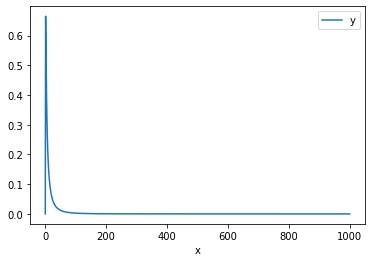

In [25]:
df = pd.DataFrame({'x': x, 'y': y})
df.plot(
    x='x',
    y='y',
    layout=dict(
        xaxis=dict(
            type='log',
            tickfont=dict(size=16),
            titlefont=dict(size=18),
            title=r'$\frac{t_{future}}{t_{currrent}}$'),
        yaxis=dict(title='probability'),
        title='PDF',
        shapes=[
            dict(
                type='line',
                x0=39,
                x1=39,
                y0=0,
                y1=1,
                line=dict(color='black', dash='dash')),
            dict(
                type='line',
                x0=1 / 39,
                x1=1 / 39,
                y0=0,
                y1=1,
                name='39',
                line=dict(color='black', dash='dash'))
        ]))

plt.show()

<AxesSubplot:xlabel='x'>

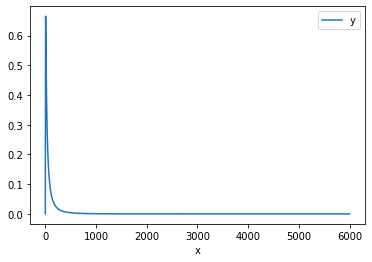

In [27]:
t_c = 6
df = pd.DataFrame({'x': x * t_c, 'y': y})
annotations = [
    dict(x=np.log10(39 * t_c), y=0.5, text='95% upper limit'),
    dict(x=np.log10(1 / 39 * t_c), y=0.5, text='95% lower limit')
]
df.plot(
    x='x',
    y='y',
    layout=dict(
        annotations=annotations,
        xaxis=dict(
            type='log',
            tickfont=dict(size=16),
            title=r'$t_{future} \text{ (years)}$'),
        yaxis=dict(title='probability'),
        title='PDF for Lifetime of Data Science',
        shapes=[
            dict(
                type='line',
                x0=39 * t_c,
                x1=39 * t_c,
                y0=0,
                y1=1,
                line=dict(color='black', dash='dash')),
            dict(
                type='line',
                x0=(1 / 39) * t_c,
                x1=(1 / 39) * t_c,
                y0=0,
                y1=1,
                name='39',
                line=dict(color='black', dash='dash'))
        ]))

plt.show()

<AxesSubplot:xlabel='x'>

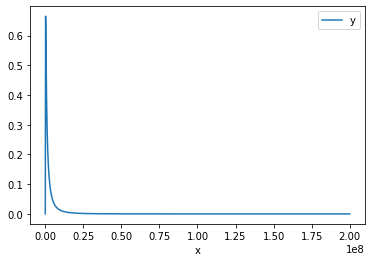

In [28]:
t_c = 200000
df = pd.DataFrame({'x': x * t_c, 'y': y})
annotations = [
    dict(x=np.log10(39 * t_c), y=0.5, text='95% upper limit'),
    dict(x=np.log10(1 / 39 * t_c), y=0.5, text='95% lower limit')
]
df.plot(
    x='x',
    y='y',
    layout=dict(
        annotations=annotations,
        xaxis=dict(
            type='log',
            tickfont=dict(size=16),
            title=r'$t_{future} \text{ (years)}$'),
        yaxis=dict(title='probability'),
        title='PDF for Lifetime of Human Species',
        shapes=[
            dict(
                type='line',
                x0=39 * t_c,
                x1=39 * t_c,
                y0=0,
                y1=1,
                line=dict(color='black', dash='dash')),
            dict(
                type='line',
                x0=(1 / 39) * t_c,
                x1=(1 / 39) * t_c,
                y0=0,
                y1=1,
                name='39',
                line=dict(color='black', dash='dash'))
        ]))
plt.show()